In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from math import ceil

# YOUTUBE DATASETS
## A complete Machine Learning project
***Classification, Regression, Clustering, Clustering, Recommendation***

Mitko Stoychev Dimitrov

01/08/2024

## 1. Objective of the work

The objective of this practice is to extract the greatest possible value from the data in order to solve a series of business problems using the techniques I have learnt.

A package called models must be created and there must be in it:

A Python script with each necessary model (e.g. svm_classifier.py, mlp_regressor.py, kmeans_clustering.py...) containing a class with the model (e.g. SVMClassifier, MLPRegressor...). These classes will have 5 public methods and all the necessary private methods (for example, a private method called __preprocess_data() can be created to serve as an auxiliary method to perform the previous transformations required in those models that need them):

-  The **init** to which the appropriate parameters must be passed (it may not be necessary to pass any).
-  A method called **fit** that will receive input data in ‘Data Frame’ or ‘numpy array’ format and will train the model, storing the weights and other attributes that are deemed necessary to store within the self of the class.
-  A method called **predict** that will use this information stored in the class to make predictions based on the new data. For example, if the model is a classification model, this method should return the class or classes to which the queried data corresponds. It must be able to make inference from a single observation as well as from a set of observations.
-  A method called **save** that allows the data saved within the class (weights, states of preprocessor objects...) to be saved on disk serialised in pickle, allowing the model to continue to be used in the future without re-training it.
-  A method called **load** that allows reloading the state of the class itself from disk in order to be able to call predict again in a future session without having to ‘retrain’ the model.

Out of this package there should be 4 more files:

- A file called **preprocess_data.py** which will perform the required transformations, data cleaning and changes common to all models. Model-specific transformations must be performed inside the corresponding class, not in this file. It must receive two input arguments, one with the path to the ‘raw’ data file and the other with the path where to leave the data already cleaned and processed for the models.
- A file **called train_models.py** that will import the package, instantiate the models, train them by invoking the ‘fit’ method of each one with the dataset and then serialise to disk what has been learned by means of the ‘save’ method. Both the path from which to read the source data and the paths to save the pickle files of each model must be obtained from a configuration file in configparser format which we will call **train.conf**. The path to this configuration file must be passed as an argument to the script and the argparse library must be used to process this argument. It is recommended to create sections within this configuration file.
- A file called **inference_model.py** that will instantiate a model, read through the ‘load’ method what it has already learned and perform the inference of new data. It will receive three input arguments, and the argparse library must be used to process these arguments. These arguments will be the type of model to be used for inference, the concrete weights to be used from that model and the input data file on which we want to perform the inference.- 
A Jupyter notebook, which we will call** exploratory_analysis.ipyn**b. This notebook should load the data, perform an exhaustive exploratory analysis trying to extract as much information as possible from them and then try with the data all the techniques and models that apply to the resolution of the problem seen during module 3 (machine learning). The performance of each technique that is oriented to the same purpose should be compared and through this procedure the ones that will finally be industrialised within the models package should be chosen. Likewise, not only should you compare technique to technique, but once you have chosen one of them, you have to try to find the optimal hyperparameters and the most suitable input data transformations to obtain the best results


Now let's talk about the dataset used and the business problems we want to solve. The dataset includes several months of data on daily trending videos from YouTube. The data also includes a category_id field, which varies between regions. To retrieve the categories for a specific video, we need to look it up in the associated JSON. One such file is included for each of the regions in the dataset. The first step of the pre-processing should be to cross-reference both files for each region and replace the IDs in the CSVs with the corresponding tags. Then, all the data enriched in the previous step for all regions should be merged into a single CSV that includes a new column with the name of the region. All this logic should be implemented in **preprocess_data.py**.

All possible models for each of the following business problems should be tested, industrialising in the package only the best of them for each of the cases, with the best hyperparameters and prior transformations found.

- **Classification**:
    - Normal challenge: Create a classifier that predicts the category of the video.
    - Optional challenge: Create a classification algorithm that tries to find out as best as possible whether comments or ratings will be disabled by the video creator based on the rest of the information. As it is a highly unbalanced classification, it will be valued not only to obtain a high accuracy, but also to study in a confusion matrix if it is excessively biased towards the majority class and in case it happens to try to mitigate this fact.
- **Regression**:
    - Normal challenge: Try to predict the number of likes.
    - Optional up-scoring challenge: Try to predict the ratio of likes/dislikes for each video.
- **Clustering**:
    - Try to find groups in the videos using various clustering techniques. Evaluate how each overlaps with respect to the categories in the videos. Use dimensionality reduction techniques.
- **Recommendation**:
    - Create a recommender that, given a video, recommends similar videos..

## 2. Import the data
Original data source:  https://drive.google.com/file/d/16rdg0eP4e5Db99sAXwAQfSOvgUatOgLj/view?usp=sharing

The imported data are already **preprocessed**. The step of preprocessing the data has been performed in the script *preprocess_data.py*.

In [2]:
data = pd.read_csv("preprocessed_data/preprocessed_data.csv", index_col="video_id")
data

,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,state,category
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. BeyoncÃ© ...,Canada,Music
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Canada,Comedy
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...,Canada,Comedy
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Canada,Entertainment
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,ð§: https://ad.gt/yt-perfect\nð°: https://...,Canada,Music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,United States,Pets & Animals
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,United States,People & Blogs
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,United States,Entertainment


## 3. Data Quality

Data Quality Analysis phase, ensuring the integrity and usability of data is crucial. Here are the steps that I will follow to check the data quality:
1. Global vision
   - General information of the dataset
   - Dataset shape
   - Fix the data type

2. Check for Missing Values (Null Data)
    - Identify Missing Values: Use functions like isnull() or isna() in pandas to identify missing values.
    - Quantify Missing Values: Determine the percentage of missing values in each column to understand the extent of the issue.
    - Handle Missing Values: Decide on a strategy to handle missing values, such as: remove or impute missing data.
    
3. Check for Duplicate Data
    - Identify Duplicates: Use functions like duplicated() to find duplicate rows.
    - Remove Duplicates: Remove duplicates using drop_duplicates().
      
4. Check for Inconsistent Data
    - Consistency Checks: Ensure that categorical data values are consistent. For example, check for variations in the category names("USA" vs "U.S.A" vs "United States")
    - Standardization: Standardize categorical variables to a consistent format.
      
5. Check for Outliers
    - Identify Outliers: Use visualizations (box plots, scatter plots) and statistical methods (Z-score, IQR) to detect outliers.
    - Handle Outliers: Decide whether to remove, transform, or keep outliers based on their impact on the analysis.t on the analysis.

### 3.1. Global vision

#### 3.1.1. General data information

In [3]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 375942 entries, n1WpP7iowLc to ooyjaVdt-jA
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           375942 non-null  object
 1   title                   375942 non-null  object
 2   channel_title           375942 non-null  object
 3   publish_time            375942 non-null  object
 4   tags                    375942 non-null  object
 5   views                   375942 non-null  int64 
 6   likes                   375942 non-null  int64 
 7   dislikes                375942 non-null  int64 
 8   comment_count           375942 non-null  int64 
 9   thumbnail_link          375942 non-null  object
 10  comments_disabled       375942 non-null  bool  
 11  ratings_disabled        375942 non-null  bool  
 12  video_error_or_removed  375942 non-null  bool  
 13  description             356464 non-null  object
 14  state                   37

Converting object data types to more specific types like int, category, or datetime in a DataFrame has several benefits, including improved performance, reduced memory usage, and better data integrity.

In [4]:
# Convert trending_date from object to pandas datetime()
data["trending_date"] = pd.to_datetime(data["trending_date"], format="%y.%d.%m", errors="raise")

# title → No transformation it´s a string
data["title"] = data["title"].astype(str)

# channel_title → from object to categorical
data["channel_title"] = data["channel_title"].astype("category")

# publish_time → from object to pandas datetime()
data["publish_time"] = pd.to_datetime(data["publish_time"], errors="raise")

# tags
data["tags"] = data["tags"].astype("category")

# views
data["thumbnail_link"] = data["thumbnail_link"].astype(str)

# Convert boolean columns to integers
data["comments_disabled"] = data["comments_disabled"].astype(int)
data["ratings_disabled"] = data["ratings_disabled"].astype(int)
data["video_error_or_removed"] = data["video_error_or_removed"].astype(int)

# state → from object to categorical
data["state"] = data["state"].astype("category")

# category → from object to categorical
data["category"] = data["category"].astype("category")

data.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
Index: 375942 entries, n1WpP7iowLc to ooyjaVdt-jA
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   trending_date           375942 non-null  datetime64[ns]     
 1   title                   375942 non-null  object             
 2   channel_title           375942 non-null  category           
 3   publish_time            375942 non-null  datetime64[ns, UTC]
 4   tags                    375942 non-null  category           
 5   views                   375942 non-null  int64              
 6   likes                   375942 non-null  int64              
 7   dislikes                375942 non-null  int64              
 8   comment_count           375942 non-null  int64              
 9   thumbnail_link          375942 non-null  object             
 10  comments_disabled       375942 non-null  int32              
 11  ratings_disabled

Now, the memory usage has reduced 14 times and now the dataset is more prepared for ML and this for sure will increase the model performance.

#### 3.1.2. Dataset dimension

In [5]:
data.shape

(375942, 16)

#### 3.1.3. Index information

In [6]:
data.index

Index(['n1WpP7iowLc', '0dBIkQ4Mz1M', '5qpjK5DgCt4', 'd380meD0W0M',
       '2Vv-BfVoq4g', '0yIWz1XEeyc', '_uM5kFfkhB8', '2kyS6SvSYSE',
       'JzCsM1vtn78', '43sm-QwLcx4',
       ...
       'pcJo0tIWybY', '_QWZvU7VCn8', '7UoP9ABJXGE', 'ju_inUnrLc4',
       '1PhPYr_9zRY', 'BZt0qjTWNhw', '1h7KV2sjUWY', 'D6Oy4LfoqsU',
       'oV0zkMe1K8s', 'ooyjaVdt-jA'],
      dtype='object', name='video_id', length=375942)

#### 3.1.4. Column information

In [7]:
data.columns

Index(['trending_date', 'title', 'channel_title', 'publish_time', 'tags',
       'views', 'likes', 'dislikes', 'comment_count', 'thumbnail_link',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description', 'state', 'category'],
      dtype='object')

#### 3.1.5. Number of unique values

In [8]:
data.nunique().sort_values(ascending=False)

views                     240399
title                     186272
thumbnail_link            185690
publish_time              169286
description               156165
tags                      142211
likes                      73693
channel_title              37824
comment_count              24477
dislikes                   16715
trending_date                205
category                      18
state                         10
comments_disabled              2
ratings_disabled               2
video_error_or_removed         2
dtype: int64

Conclusions:
- There are no unique values, i.e. all characteristics of the dataset are variables, i.e. they are not constants.

#### 3.1.6 Overview of statisticians

In [9]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
trending_date,375942,2018-02-28 21:17:35.747961088,2017-11-14 00:00:00,2018-01-06 00:00:00,2018-03-01 00:00:00,2018-04-25 00:00:00,2018-06-14 00:00:00,NaN
views,375942.0,1326568.256633,117.0,46978.0,177370.5,647679.25,424538912.0,7098567.720905
likes,375942.0,37884.311423,0.0,669.0,3446.0,17476.5,5613827.0,165413.081272
dislikes,375942.0,2126.107275,0.0,41.0,179.0,749.0,1944971.0,22484.367729
comment_count,375942.0,4253.775021,0.0,109.0,511.0,2011.0,1626501.0,25458.75603
comments_disabled,375942.0,0.022511,0.0,0.0,0.0,0.0,1.0,0.14834
ratings_disabled,375942.0,0.019439,0.0,0.0,0.0,0.0,1.0,0.138063
video_error_or_removed,375942.0,0.000673,0.0,0.0,0.0,0.0,1.0,0.025933


In [10]:
data.describe(include="O").T

,count,unique,top,freq
title,375942,186272,Mission: Impossible - Fallout (2018) - Officia...,100
thumbnail_link,375942,185690,https://i.ytimg.com/vi/VYOjWnS4cMY/default.jpg,92
description,356464,156165,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,467


### 3.2. Check for Null Data

Null count by variable

In [11]:
data.isna().sum().sort_values(ascending=False)

description               19478
category                   2738
trending_date                 0
title                         0
channel_title                 0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
state                         0
dtype: int64

Null percentage by variable

In [12]:
data.isna().mean().sort_values(ascending=False) * 100

description               5.181118
category                  0.728304
trending_date             0.000000
title                     0.000000
channel_title             0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
thumbnail_link            0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
state                     0.000000
dtype: float64

Conclusions:

The vast majority of the variables do not have nulls. This is good, however 2 of the features do.
- "description" a priori  is not the most decisive feature, for example, in terms of prediction the number of likes of a video → drop feature
- "category" → fill data with after EDA

In [13]:
data.drop(columns=["description"], inplace=True)

### 3.3. Check for duplicates

In [14]:
data.reset_index(inplace=True)

In [15]:
data.duplicated().sum()

12570

In [16]:
data[(data.duplicated(keep=False))].video_id.value_counts()

video_id
#NAME?         346
naW9U8MiUY0     14
7C2z4GqqS5E     14
6S9c5nnDd_s     12
pVxOVlm_lE8     12
              ... 
2jNNX6seO3M      2
MhI8jDnaZi0      2
LibUvjhWalQ      2
hVO5-kU4OaQ      2
2PH7dK6SLC8      2
Name: count, Length: 9518, dtype: int64

In [17]:
# analizing the pattern 1
data[(data.duplicated(keep=False)) & (data["video_id"] == "RUCXD3_wW2w")]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,category
156074,RUCXD3_wW2w,2018-05-14,New Hulu Show - SNL,Saturday Night Live,2018-05-13 04:59:28+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",723495,6362,1589,420,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,0,0,0,United Kingdom,Entertainment
156188,RUCXD3_wW2w,2018-05-14,New Hulu Show - SNL,Saturday Night Live,2018-05-13 04:59:28+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",723495,6362,1589,420,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,0,0,0,United Kingdom,Entertainment
156246,RUCXD3_wW2w,2018-05-15,Handmaids in the City - SNL,Saturday Night Live,2018-05-13 04:59:28+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",1094378,8781,2234,600,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,0,0,0,United Kingdom,Entertainment
156320,RUCXD3_wW2w,2018-05-15,Handmaids in the City - SNL,Saturday Night Live,2018-05-13 04:59:28+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",1094378,8781,2234,600,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,0,0,0,United Kingdom,Entertainment
156404,RUCXD3_wW2w,2018-05-16,Handmaids in the City - SNL,Saturday Night Live,2018-05-13 04:59:28+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",1250529,9870,2437,649,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,0,0,0,United Kingdom,Entertainment
156552,RUCXD3_wW2w,2018-05-16,Handmaids in the City - SNL,Saturday Night Live,2018-05-13 04:59:28+00:00,"SNL|""Saturday Night Live""|""SNL Season 43""|""SNL...",1250529,9870,2437,649,https://i.ytimg.com/vi/RUCXD3_wW2w/default.jpg,0,0,0,United Kingdom,Entertainment


In [18]:
# analizing the pattern 2
data[(data.duplicated(keep=False)) & (data["video_id"] == "naW9U8MiUY0")]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,category
197459,naW9U8MiUY0,2018-06-08,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",6904550,203804,3523,23756,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
197592,naW9U8MiUY0,2018-06-08,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",6904550,203804,3523,23756,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
197641,naW9U8MiUY0,2018-06-09,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",12204090,322782,6355,34553,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
197786,naW9U8MiUY0,2018-06-09,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",12204090,322782,6355,34553,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
197839,naW9U8MiUY0,2018-06-10,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",16956149,397645,8865,41103,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
197972,naW9U8MiUY0,2018-06-10,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",16956149,397645,8865,41103,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
198023,naW9U8MiUY0,2018-06-11,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",17571728,405974,9285,41917,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
198154,naW9U8MiUY0,2018-06-11,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",17571728,405974,9285,41917,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
198220,naW9U8MiUY0,2018-06-12,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",19007336,422573,10163,43419,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment
198343,naW9U8MiUY0,2018-06-12,HOW TO TRAIN YOUR DRAGON 3 Trailer (2019),FilmSelect Trailer,2018-06-07 14:43:02+00:00,"trailer|""movie""|""filmselect""|""HOW TO TRAIN YOU...",19007336,422573,10163,43419,https://i.ytimg.com/vi/naW9U8MiUY0/default.jpg,0,0,0,India,Entertainment


In [19]:
# analizing the pattern 3
data[(data.duplicated(keep=False)) & (data["video_id"] == "7C2z4GqqS5E")]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,category
215019,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,Japan,Music
215033,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,Japan,Music
215047,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,Japan,Music
215061,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,Japan,Music
249205,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,South Korea,Music
249305,7C2z4GqqS5E,2018-05-20,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",62796390,4470923,119053,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,South Korea,Music
249407,7C2z4GqqS5E,2018-05-21,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,South Korea,Music
249527,7C2z4GqqS5E,2018-05-21,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,South Korea,Music
249588,7C2z4GqqS5E,2018-05-22,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,South Korea,Music
249722,7C2z4GqqS5E,2018-05-22,BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,ibighit,2018-05-18 09:00:02+00:00,"BIGHIT|""ë¹ íí¸""|""ë°©íìë ë¨""|""BTS""|""BA...",73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,0,0,0,South Korea,Music


In [20]:
data[(data.duplicated(keep=False)) & (data["video_id"] == "#NAME?")]

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,state,category
175732,#NAME?,2018-01-31,MAA - Short Film | Ondraga Originals | Sarjun ...,Ondraga Entertainment,2018-01-27 06:11:41+00:00,"Ondraga Entertainment|""Gautham Vasudev Menon""|...",1381272,47515,1653,4633,https://i.ytimg.com/vi/-lKk_5qYdkk/default.jpg,0,0,0,India,Film & Animation
175869,#NAME?,2018-01-31,MAA - Short Film | Ondraga Originals | Sarjun ...,Ondraga Entertainment,2018-01-27 06:11:41+00:00,"Ondraga Entertainment|""Gautham Vasudev Menon""|...",1381272,47515,1653,4633,https://i.ytimg.com/vi/-lKk_5qYdkk/default.jpg,0,0,0,India,Film & Animation
175929,#NAME?,2018-02-01,MAA - Short Film | Ondraga Originals | Sarjun ...,Ondraga Entertainment,2018-01-27 06:11:41+00:00,"Ondraga Entertainment|""Gautham Vasudev Menon""|...",1726001,56553,1968,5195,https://i.ytimg.com/vi/-lKk_5qYdkk/default.jpg,0,0,0,India,Film & Animation
176042,#NAME?,2018-02-01,MAA - Short Film | Ondraga Originals | Sarjun ...,Ondraga Entertainment,2018-01-27 06:11:41+00:00,"Ondraga Entertainment|""Gautham Vasudev Menon""|...",1726001,56553,1968,5195,https://i.ytimg.com/vi/-lKk_5qYdkk/default.jpg,0,0,0,India,Film & Animation
176896,#NAME?,2018-02-07,Made for Each Other I S2 EP-27 I Jo Jeeta Wohi...,Mazhavil Manorama,2018-02-06 05:00:01+00:00,"Mazhavil Manorama|""Made for Each Other""|""S2 EP...",360579,1636,242,967,https://i.ytimg.com/vi/-TkyRjssb1Q/default.jpg,0,0,0,India,Entertainment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251649,#NAME?,2018-06-02,ëí ë°°íê·¸ë¼ì´ë : í°ë° (ìì¦ 2-4...,ì½ë Korner,2018-06-01 10:31:00+00:00,"nerf|""nerf gun""|""ëí""|""ë°°íê·¸ë¼ì´ë""|...",74737,1234,37,434,https://i.ytimg.com/vi/-Dls6gQgqeE/default.jpg,0,0,0,South Korea,Entertainment
252972,#NAME?,2018-06-10,[2018 KBO ì ê·ìì¦] ì´ë ê² ë©ì§ ì¸ë¦...,BearSpotvë² ì´ì¤í¬í°ë¹,2018-06-10 11:31:47+00:00,"spotv|""ì¤í¬í°ë¹""|""bearspotv""|""ë² ì´ì¤í¬...",28169,914,7,185,https://i.ytimg.com/vi/-ifYtIQ9KIc/default.jpg,0,0,0,South Korea,Sports
253122,#NAME?,2018-06-10,[2018 KBO ì ê·ìì¦] ì´ë ê² ë©ì§ ì¸ë¦...,BearSpotvë² ì´ì¤í¬í°ë¹,2018-06-10 11:31:47+00:00,"spotv|""ì¤í¬í°ë¹""|""bearspotv""|""ë² ì´ì¤í¬...",28169,914,7,185,https://i.ytimg.com/vi/-ifYtIQ9KIc/default.jpg,0,0,0,South Korea,Sports
253488,#NAME?,2018-06-13,ë¯¸ì°ì ì ì´ë¦¼ ëíì ìì¸í ë ì ...,SBS Catch,2018-06-12 05:00:01+00:00,"ì¤ë¸ì¤ìºì¹|""ë¯¸ì´ì°ë¦¬ìë¼""|""ë¯¸ì°ì...",96412,572,22,93,https://i.ytimg.com/vi/-Yr3cNO_09o/default.jpg,0,0,0,South Korea,Entertainment


Conclusions:

Estoy jodido, ya le daré una vuelta
    - pero imputar de alguna forma NAME?
- 

### 3.4. Check for inconsistent data

In [21]:
categorical_data = data.select_dtypes(["O", "category"])
for col in categorical_data.columns:
    print(col)
    print(categorical_data[col].unique())
    print("*********************************************************")

video_id
['n1WpP7iowLc' '0dBIkQ4Mz1M' '5qpjK5DgCt4' ... 'qPEIPu0V8GQ' 'dS5Thrl-4Kc'
 'yz7Xq3T0YPs']
*********************************************************
title
['Eminem - Walk On Water (Audio) ft. BeyoncÃ©'
 'PLUSH - Bad Unboxing Fan Mail'
 'Racist Superman | Rudy Mancuso, King Bach & Lele Pons' ...
 'Fortnite Celebrity Pro-Am | #FortniteProAm'
 'CRAYOLA MAKEUP | HIT OR MISS?'
 'Katherine Langford on 13 Reasons Why, Australia & Doctor Parents']
*********************************************************
channel_title
['EminemVEVO', 'iDubbbzTV', 'Rudy Mancuso', 'nigahiga', 'Ed Sheeran', ..., 'Bethesda Softworks', 'Cyberpunk 2077', 'Ben Kronengold', 'All Def Digital', 'How It Should Have Ended']
Length: 37824
Categories (37824, object): ['! ì¸ìì ë¬´ì¨ì¼ì´', '!!8æã ãé¢ç½ãã¿å¤§éå', '!BTSã»TWICE ã¾ã¨ã', '!Los amorosos ViralesÂ¡', ..., 'ï¼¢ï¼¡ï¼³ï¼¨ï½ï½', 'ï¼«ã®ãã£ãã·ã³ã°ã¡ããã­ã', 'ï¼·ï¼¡ï¼ªï¼¯ï¼©ï¼«ï¼¡', 'ðSandrea']
************************

Conclusions:
* At first glance, it seems all the data is correct and there are not any inconsistency.
* All features are variables, i.e. there are no constants in the dataset.

In [22]:
numeric_data = data.select_dtypes("number")

### 3.5. Check for outliers

In [23]:
def outlier_detection(data, features):
    """
    Takes a dataframe and a list of the columns that is decided to apply Tukey´s method for detecting outliers.
    Returns a list of indices that are considered outliers.
    """
    outlier_indices = []
    n = 2 # treshold
    
    # Iterate over each feature
    for col in features:
        # Calculate quartiles
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1      
        
        # Determine the index of the outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - 1.5 * IQR) | (data[col] > Q3 + 1.5 * IQR)].index
        
        # Append indices of outliers for every col 
        outlier_indices.extend(outlier_list_col)
        
    # Count occurrences of each index
    outlier_count = Counter(outlier_indices)
    
    # Select indices with more than n outliers
    multiple_outliers = [index for index, count in outlier_count.items() if count > n]
    
    return multiple_outliers

In [24]:
outliers_to_drop = outlier_detection(numeric_data, numeric_data.columns)
print(outliers_to_drop)

[0, 2, 3, 4, 6, 8, 10, 13, 22, 23, 32, 40, 44, 48, 49, 55, 87, 90, 103, 121, 122, 156, 164, 200, 201, 204, 214, 218, 219, 226, 227, 236, 240, 244, 251, 252, 258, 280, 282, 304, 305, 320, 351, 374, 381, 395, 400, 401, 402, 404, 406, 407, 410, 413, 419, 431, 438, 444, 448, 453, 454, 458, 483, 498, 501, 546, 557, 571, 600, 601, 602, 603, 608, 610, 611, 613, 622, 627, 635, 641, 643, 664, 683, 685, 693, 694, 722, 723, 734, 740, 749, 767, 781, 791, 800, 801, 802, 803, 804, 815, 817, 823, 828, 830, 832, 834, 836, 848, 856, 870, 875, 900, 906, 914, 923, 940, 945, 960, 979, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1008, 1010, 1011, 1053, 1061, 1068, 1075, 1076, 1085, 1086, 1103, 1111, 1113, 1114, 1131, 1145, 1199, 1200, 1201, 1204, 1207, 1209, 1210, 1212, 1215, 1216, 1220, 1225, 1245, 1251, 1258, 1265, 1308, 1312, 1329, 1338, 1350, 1370, 1371, 1378, 1394, 1399, 1402, 1405, 1408, 1413, 1416, 1418, 1424, 1428, 1442, 1447, 1450, 1452, 1461, 1462, 1464, 1469, 1497, 1499, 1507, 1511, 1539, 1558, 156

Conclusions:
* Note: There are a lot of indices that are the duplicated. I will see how to manage this later.
* A priori I will not eliminate the "outliers" because they are historical youtube videos. If the ML model does not work correctly, I will return to this point.

## 4. EDA Categorical Data

In [25]:
categorical_data

,video_id,title,channel_title,tags,thumbnail_link,state,category
0,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. BeyoncÃ©,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Canada,Music
1,0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,Canada,Comedy
2,5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,Canada,Comedy
3,d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",https://i.ytimg.com/vi/d380meD0W0M/default.jpg,Canada,Entertainment
4,2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,Canada,Music
...,...,...,...,...,...,...,...
375937,BZt0qjTWNhw,The Cat Who Caught the Laser,AaronsAnimals,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,United States,Pets & Animals
375938,1h7KV2sjUWY,True Facts : Ant Mutualism,zefrank1,[none],https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,United States,People & Blogs
375939,D6Oy4LfoqsU,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,I gave safiya nygaard a perfect hair makeover ...,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,United States,Entertainment
375940,oV0zkMe1K8s,How Black Panther Should Have Ended,How It Should Have Ended,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,United States,Film & Animation


In [34]:
def charts_eda_categorical(cat):
    
    #calculate the number of rows
    rows = cat.shape[1]

    #define the graph
    f, ax = plt.subplots(nrows = rows, ncols = 1, figsize = (6, rows * 6))

    #We flatten to iterate through the graph as if it were 1-dimensional instead of 2-dimensional.
    ax = ax.flat 

    #We create the loop that adds graphics
    for index, variable in enumerate(cat):   # enumerate provides both index and column name
        cat[variable].value_counts().plot.barh(ax = ax[index])
        ax[index].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[index].tick_params(labelsize = 12)

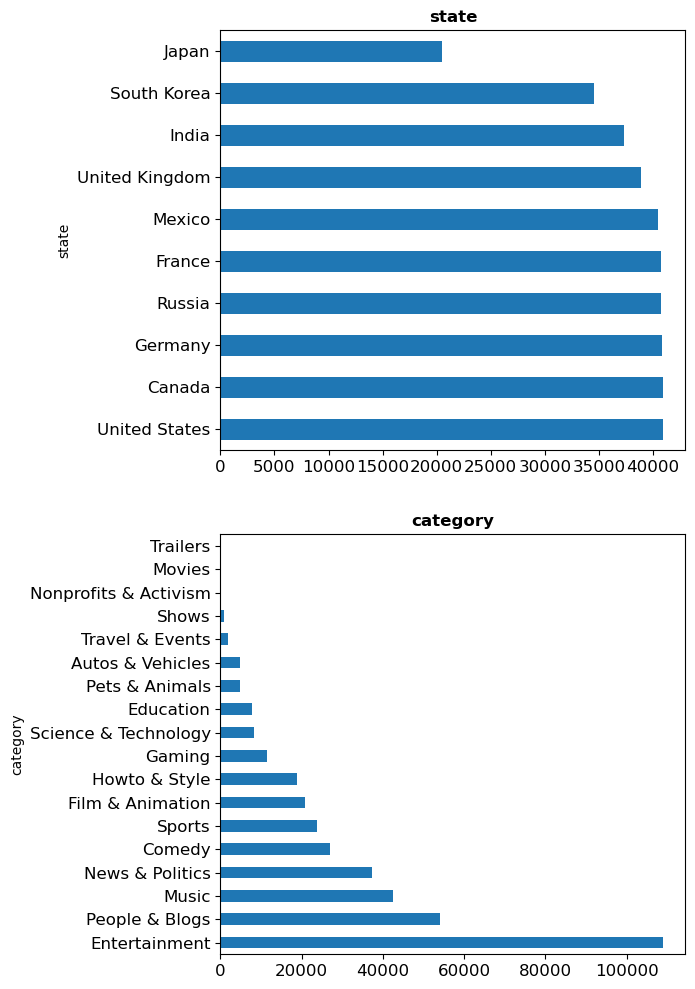

In [35]:
charts_eda_categorical(categorical_data[["state", "category"]])

## 5. EDA Numerical Data

In [36]:
def statistics_cont(num):
    #use describe method transposed
    statistics = num.describe().T
    #Add the median
    statistics['median'] = num.median()
    # rearrange so that the median is next to the mean.
    statistics = statistics.iloc[:, [0, 1, 8, 2, 3, 4, 5, 6, 7]]
    return(statistics)

In [37]:
statistics_cont(numeric_data)

,count,mean,median,std,min,25%,50%,75%,max
views,375942.0,1.326568e+06,177370.5,7.098568e+06,117.0,46978.0,177370.5,647679.25,424538912.0
likes,375942.0,3.788431e+04,3446.0,1.654131e+05,0.0,669.0,3446.0,17476.50,5613827.0
dislikes,375942.0,2.126107e+03,179.0,2.248437e+04,0.0,41.0,179.0,749.00,1944971.0
comment_count,375942.0,4.253775e+03,511.0,2.545876e+04,0.0,109.0,511.0,2011.00,1626501.0
comments_disabled,375942.0,2.251145e-02,0.0,1.483400e-01,0.0,0.0,0.0,0.00,1.0
ratings_disabled,375942.0,1.943917e-02,0.0,1.380628e-01,0.0,0.0,0.0,0.00,1.0
video_error_or_removed,375942.0,6.729762e-04,0.0,2.593309e-02,0.0,0.0,0.0,0.00,1.0
